In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris_raw = pd.read_csv('iris_Class_3.csv')
iris_raw

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris_raw.shape

(150, 5)

In [6]:
print(iris_raw.groupby('cluster_pred').size())

cluster_pred
0    53
1    50
2    47
dtype: int64


### Preprocessing

#### Feature Selection

In [7]:
iris_features = iris_raw.copy()
iris_features = iris_features.drop(['cluster_pred'], axis=1)
iris_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# Extract 'species'
iris_targets = iris_raw['cluster_pred']
# iris_targets = iris_targets.values.reshape(-1,1)

# iris_targets.shape


#### Dummy Variabels & Scaling

In [9]:
# One-hot Encoding
iris_targets_dummy = pd.get_dummies(iris_targets)
iris_targets_dummy

,0,1,2
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
145,False,False,True
146,True,False,False
147,False,False,True
148,False,False,True


In [10]:
# Scaling
scaler = StandardScaler()

iris_features_scaled = scaler.fit_transform(iris_features)
iris_features_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Data Modeling

In [11]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_targets, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


#### Find the Best k for KNN

In [20]:
train_score = []
k_values = range(1,21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    k_pred = knn.predict(x_test)

    train_score.append(accuracy_score(y_test, k_pred))

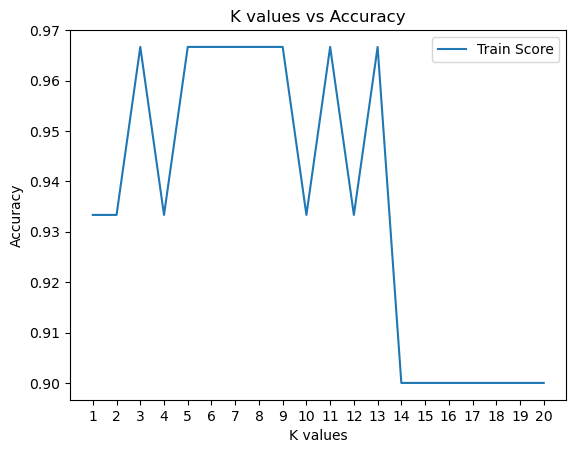

In [21]:
plt.plot(k_values, train_score, label='Train Score')

plt.xticks(k_values)
plt.title('K values vs Accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend()

### The Best k = 3

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
neigh = knn.fit(x_train, y_train)

In [15]:
y_pred = knn.predict(x_test)

In [16]:
train_accuracy = accuracy_score(y_train, neigh.predict(x_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9916666666666667
Test Accuracy: 0.9666666666666667
